Fixation counts and total durations for B1.png:
                              FixationCount  TotalDuration
CURRENT_FIX_INTEREST_AREA_ID                              
1                                       654         155835
2                                       493         129052
3                                       865         212578
4                                       440         106678
5                                       788         172977


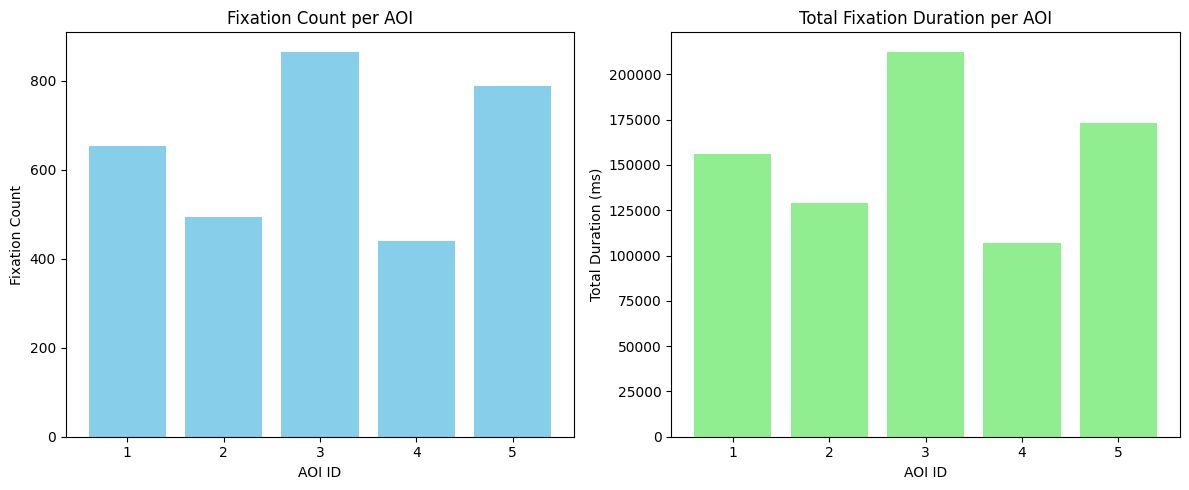

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
df = pd.read_excel("Speaking_FixationReport_Raw.xlsx")

# 过滤出 B1.png 的数据，并限制兴趣区 ID 为 1~5
df_b1 = df[(df['image'] == 'B1.png') & (df['CURRENT_FIX_INTEREST_AREA_ID'].isin([1, 2, 3, 4, 5]))]

# 计算每个兴趣区的注视次数和总时长
aoi_grouped = df_b1.groupby('CURRENT_FIX_INTEREST_AREA_ID').agg({
    'CURRENT_FIX_INTEREST_AREA_ID': 'count',
    'CURRENT_FIX_DURATION': 'sum'
}).rename(columns={
    'CURRENT_FIX_INTEREST_AREA_ID': 'FixationCount',
    'CURRENT_FIX_DURATION': 'TotalDuration'
}).sort_index()

print("Fixation counts and total durations for B1.png:")
print(aoi_grouped)

# 可视化柱状图（英文标签）
plt.figure(figsize=(12, 5))

# Fixation Count Plot
plt.subplot(1, 2, 1)
plt.bar(aoi_grouped.index.astype(str), aoi_grouped['FixationCount'], color='skyblue')
plt.title("Fixation Count per AOI")
plt.xlabel("AOI ID")
plt.ylabel("Fixation Count")

# Total Duration Plot
plt.subplot(1, 2, 2)
plt.bar(aoi_grouped.index.astype(str), aoi_grouped['TotalDuration'], color='lightgreen')
plt.title("Total Fixation Duration per AOI")
plt.xlabel("AOI ID")
plt.ylabel("Total Duration (ms)")

plt.tight_layout()
plt.show()

# 🧾 眼动数据分析脚本详解（B1.png）

本节讲解一段用于分析眼动数据的 Python 脚本，主要功能包括：
- 读取 Excel 数据
- 筛选特定图像和兴趣区的数据
- 统计注视次数与总时长
- 可视化展示

---

## 📚 第一部分：导入库与读取数据

```python
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
df = pd.read_excel("Speaking_FixationReport_Raw.xlsx")
```

### 🔍 解释：
- `pandas`：用于数据处理。
- `matplotlib.pyplot`：用于绘图。
- `pd.read_excel(...)`：读取 Excel 文件为 DataFrame 格式，便于后续操作。

---

## 🔍 第二部分：筛选感兴趣的数据

```python
# 过滤出 B1.png 的数据，并限制兴趣区 ID 为 1~5
df_b1 = df[(df['image'] == 'B1.png') & (df['CURRENT_FIX_INTEREST_AREA_ID'].isin([1, 2, 3, 4, 5]))]
```

### 🧠 功能说明：
- 使用布尔索引对原始数据进行过滤：
  - 图像文件名必须为 `'B1.png'`
  - 兴趣区 ID（`CURRENT_FIX_INTEREST_AREA_ID`）在 `[1, 2, 3, 4, 5]` 范围内
- 结果保存在 [df_b1](file:///Users/yanzeyu/Downloads/20250517/代码20250323v2/case2.py#L7-L7) 中，仅包含目标数据。

---

## 📊 第三部分：计算统计指标

```python
# 计算每个兴趣区的注视次数和总时长
aoi_grouped = df_b1.groupby('CURRENT_FIX_INTEREST_AREA_ID').agg({
    'CURRENT_FIX_INTEREST_AREA_ID': 'count',
    'CURRENT_FIX_DURATION': 'sum'
}).rename(columns={
    'CURRENT_FIX_INTEREST_AREA_ID': 'FixationCount',
    'CURRENT_FIX_DURATION': 'TotalDuration'
}).sort_index()
```

### 🧠 功能说明：
- `groupby(...)`：按兴趣区 ID 分组。
- `agg({...})`：聚合操作：
  - `count()`：统计每组中出现的次数（即注视次数）
  - `sum()`：求和每组的注视持续时间（单位应为毫秒 ms）
- `rename(...)`：重命名列名为更具可读性的名称。
- `sort_index()`：按兴趣区 ID 排序。

---

## 🖨️ 第四部分：输出结果

```python
print("Fixation counts and total durations for B1.png:")
print(aoi_grouped)
```

### 🧠 功能说明：
- 打印整理后的统计结果，便于查看或调试。

---

## 📈 第五部分：可视化展示

```python
# 可视化柱状图（英文标签）
plt.figure(figsize=(12, 5))

# Fixation Count Plot
plt.subplot(1, 2, 1)
plt.bar(aoi_grouped.index.astype(str), aoi_grouped['FixationCount'], color='skyblue')
plt.title("Fixation Count per AOI")
plt.xlabel("AOI ID")
plt.ylabel("Fixation Count")

# Total Duration Plot
plt.subplot(1, 2, 2)
plt.bar(aoi_grouped.index.astype(str), aoi_grouped['TotalDuration'], color='lightgreen')
plt.title("Total Fixation Duration per AOI")
plt.xlabel("AOI ID")
plt.ylabel("Total Duration (ms)")

plt.tight_layout()
plt.show()
```

### 🧠 功能说明：
- 创建一个宽屏画布（`figsize=(12, 5)`），并划分两个子图：
  - 左侧图：显示每个兴趣区的注视次数
  - 右侧图：显示每个兴趣区的总注视时长
- `bar(...)`：绘制柱状图
- `tight_layout()`：自动调整子图间距以避免重叠
- `show()`：显示图表

---

## ✅ 总结

| 步骤 | 内容 |
|------|------|
| 数据读取 | 使用 `read_excel` 加载眼动数据 |
| 数据筛选 | 提取 `B1.png` 和指定兴趣区的数据 |
| 数据统计 | 统计注视次数和总时长 |
| 数据展示 | 输出表格并绘制柱状图 |